# Image compression

In this problem, we are going to use k-means to compress images by reducing the number of colors.

The input image is $512 \times 512$ pixel size each of which is described by a $24$-bit color ($8$ bit per RGB channel). If you store the image pixel-wise it will take $512 \times 512 \times 3 = 786432$ bytes.

If we reduce the number of colors, this will reduce the number of bits stored significantly. In order to ensure the quality of the compressed images, we have to figure out what colors to keep the maximum information. Here is where k-means steps in. We will find 16 groups of similar colors and change every 24-bit color to the centroid of the corresponding group.

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Initialization

Loading an image for compression.

In [3]:
input_image_file = "mandrill-large.png"

Number of colors for the output image (i.e. number of clusters).

In [4]:
num_colors = num_clusters = 16

Random seed.


In [5]:
random_seed = 42

## Loading the data

Loading the data as an array of pixels.

In [6]:
input_img = img.imread(input_image_file)

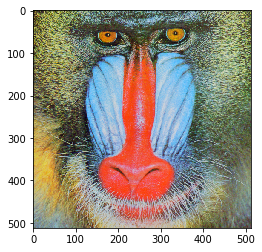

In [7]:
plt.imshow(input_img)
plt.show()

Initializing $m \times n$ training matrix.

In [8]:
color_depth = input_img.shape[-1]

In [9]:
X = input_img.reshape(-1, color_depth)

In [10]:
print('size:', X.shape)

size: (262144, 3)


## K-Means clustering

In [11]:
np.random.seed(random_seed)

Initialize centroids as colors of random pixels of the picture.

In [12]:
# Initialize centroids
centroids = X[np.random.randint(X.shape[0], size=num_clusters)]

Initizlizing a variable for storing closest centroids for every pixel.

In [13]:
closest_centroids = np.zeros(len(X), dtype=np.uint32)

Find the closest centroid for every data point.

In [14]:
def norm(x):
    return np.linalg.norm(x, ord=2)

def get_closest_centroids(X, centroids):
    return np.array([np.argmin(np.linalg.norm(centroids - item, ord=2, axis=1)) for item in X])

Move centroids to the mean of all assigned points.

In [15]:
def move_centroids(X, closest_centroids, num_clusters):
    return np.array([np.mean(X[closest_centroids == index], axis=0) for index in range(num_clusters)])

Compute k-means cost function.

In [16]:
# Compute the K-Means objective function.
def kmeans_objective(X, centroids, closest_centroids):
    return np.linalg.norm(np.linalg.norm(X - centroids[closest_centroids], ord=2, axis=1), ord=2)

In [17]:
def draw(colors):
    output_img = colors.reshape(input_img.shape)
    fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(12, 12))

    ax_before.imshow(input_img)
    ax_after.imshow(output_img)

    ax_before.set(title="Before")
    ax_after.set(title="After")

    plt.show()

Implement k-means iteration until convergence.

In [ ]:
centroids = np.loadtxt('colors.txt')

In [18]:
print('About 200 iterations expected (5 minutes)')
objective_history = [np.inf]
convergence = False
iteration = 0
while not convergence:
    old_closest_centroids = closest_centroids
    closest_centroids = get_closest_centroids(X, centroids)
    migrations = np.sum(old_closest_centroids != closest_centroids)
    print('number of migrations:', migrations)
    centroids = move_centroids(X, closest_centroids, num_clusters)
    
    # Compute the objective.
    objective = kmeans_objective(X, centroids, closest_centroids)
    objective_history.append(objective)
    
    # Increase iteration counter
    iteration += 1
    
    # compute convergence
    convergence = (migrations == 0)  # objective * 1.0001 > objective_history[-2]
    
    print("Iteration: {0:2d}    Objective: {1:.3f}".format(iteration, objective))

About 100 iterations expected
number of migrations: 252459
Iteration:  1    Objective: 60.337
number of migrations: 39616
Iteration:  2    Objective: 56.818
number of migrations: 24767
Iteration:  3    Objective: 55.454
number of migrations: 16439
Iteration:  4    Objective: 54.789
number of migrations: 13144
Iteration:  5    Objective: 54.352
number of migrations: 10932
Iteration:  6    Objective: 54.035
number of migrations: 9455
Iteration:  7    Objective: 53.795
number of migrations: 8183
Iteration:  8    Objective: 53.608
number of migrations: 7366
Iteration:  9    Objective: 53.450
number of migrations: 6663
Iteration: 10    Objective: 53.307
number of migrations: 6395
Iteration: 11    Objective: 53.170
number of migrations: 6143
Iteration: 12    Objective: 53.034
number of migrations: 5988
Iteration: 13    Objective: 52.884
number of migrations: 5909
Iteration: 14    Objective: 52.688
number of migrations: 6238
Iteration: 15    Objective: 52.319
number of migrations: 6199
Iterat

number of migrations: 388
Iteration: 134    Objective: 50.362
number of migrations: 356
Iteration: 135    Objective: 50.361
number of migrations: 300
Iteration: 136    Objective: 50.361
number of migrations: 324
Iteration: 137    Objective: 50.360
number of migrations: 296
Iteration: 138    Objective: 50.360
number of migrations: 262
Iteration: 139    Objective: 50.359
number of migrations: 227
Iteration: 140    Objective: 50.359
number of migrations: 208
Iteration: 141    Objective: 50.359
number of migrations: 182
Iteration: 142    Objective: 50.359
number of migrations: 181
Iteration: 143    Objective: 50.359
number of migrations: 187
Iteration: 144    Objective: 50.358
number of migrations: 185
Iteration: 145    Objective: 50.358
number of migrations: 176
Iteration: 146    Objective: 50.358
number of migrations: 196
Iteration: 147    Objective: 50.358
number of migrations: 206
Iteration: 148    Objective: 50.358
number of migrations: 209
Iteration: 149    Objective: 50.358
number o

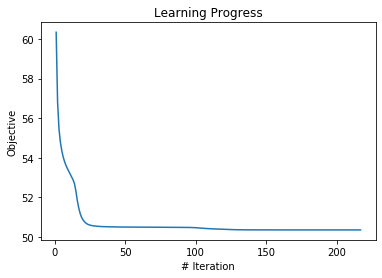

In [19]:
ax = plt.plot(objective_history)[0].axes

ax.set(xlabel="# Iteration")
ax.set(ylabel="Objective")
ax.set(title="Learning Progress")

plt.show()

In [35]:
#np.savetxt('colors.txt', centroids)

## Compression results

Represent each point as a closest centroid.

In [22]:
output_img = centroids[closest_centroids].reshape(input_img.shape)

Compare original and compressed images.

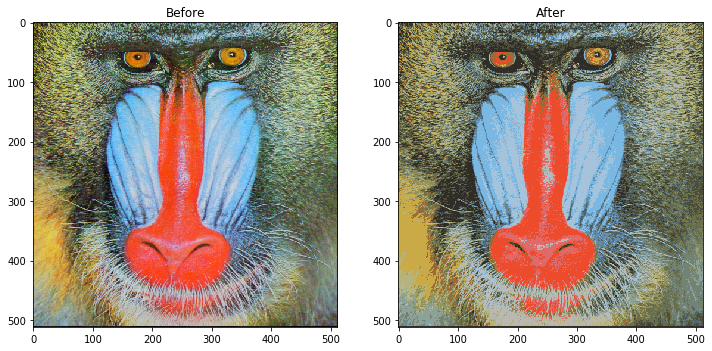

In [23]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(12, 12))

ax_before.imshow(input_img)
ax_after.imshow(output_img)

ax_before.set(title="Before")
ax_after.set(title="After")

plt.show()